# Receive Renovar API Data

## Constants and imports

### Imports

In [2]:
from SensorData import SensorData
from GetSensorDataService import GetSensorDataService

### Sensors IDs

In [9]:
TEMPERATURE_ID     =  130
EXT_HUMIDITY_ID    =  139

### API Constants

In [4]:
HOST = "renovar.lcqar.ufsc.br"
PORT = 8080

### Temperature Sensor Constants

In [21]:
temp_sensor_name = 'chamber_temp'
temp_lower_limit = -40.0
temp_upper_limit = 85
sampling_period = 15 * 60

### Humidity Sensor Constants

In [22]:
hum_sensor_name = 'ambient_temp'
hum_lower_limit = 0.0
hum_upper_limit = 100

# Temperature Data

## Sensor Chamber Temperature

In [23]:
get_sensor_data_service = GetSensorDataService(HOST, PORT)
sensor_data = get_sensor_data_service.get_data_from_file("data/raw-data-monit-fix-2022-2023-Diamante/INT_TMP.CSV",
                                                         sensor_name=temp_sensor_name)
sensor_data.head()

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/GetSensorDataService.py:13: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['DateTime'] = (pd.to_datetime(df[date_time_col], infer_datetime_format=False, format='%d/%m/%Y/%H/%M/%S'))


,latitude,longitude,measuring,DateTime
0,-28.456899,-48.972999,29.55,2022-11-21 10:49:21
1,-28.456899,-48.972999,30.14,2022-11-21 11:05:08
2,-28.456899,-48.972999,30.61,2022-11-21 11:20:55
3,-28.456899,-48.972999,30.82,2022-11-21 11:36:41
4,-28.456899,-48.972999,30.99,2022-11-21 11:52:19


In [24]:
chamber_temp_data = SensorData(TEMPERATURE_ID, sensor_name=temp_sensor_name, lower_limit=temp_lower_limit, 
                               upper_limit=temp_upper_limit, t_90=30, t_90_value=10e3, sampling_period=sampling_period,
                               get_service=get_sensor_data_service, molar_mass=0.0)

## External Humidity

In [25]:
get_sensor_data_service = GetSensorDataService(HOST, PORT)
sensor_data = get_sensor_data_service.get_data_from_file("data/raw-data-monit-fix-2022-2023-Diamante/EXT_HUM.CSV",
                                                         sensor_name=hum_sensor_name)
sensor_data.head()

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/GetSensorDataService.py:13: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['DateTime'] = (pd.to_datetime(df[date_time_col], infer_datetime_format=False, format='%d/%m/%Y/%H/%M/%S'))


,latitude,longitude,measuring,DateTime
0,-28.456899,-48.972999,-73.74,2022-11-20 13:44:15
1,-28.456899,-48.972999,-61.27,2022-11-21 10:36:42
2,-28.456899,-48.972999,-68.13,2022-11-21 10:52:30
3,-28.456899,-48.972999,-73.00,2022-11-21 11:08:17
4,-28.456899,-48.972999,-70.38,2022-11-21 11:24:04


In [26]:
hum_data = SensorData(EXT_HUMIDITY_ID, sensor_name=hum_sensor_name, lower_limit=hum_lower_limit, 
                               upper_limit=hum_upper_limit, t_90=30, t_90_value=10e3, 
                               sampling_period=sampling_period, get_service=get_sensor_data_service, molar_mass=0.0)

# Upload Data from Files

## Temperature Data

In [27]:
import pandas as pd

directory_path = 'data/input/'
file_name = temp_sensor_name + 'web_dataframe.csv'
df = pd.read_csv(directory_path + file_name)
df.head()

,Unnamed: 0,latitude,longitude,measuring,DateTime
0,0,-28.456899,-48.972999,29.55,2022-11-21 10:49:21
1,1,-28.456899,-48.972999,30.14,2022-11-21 11:05:08
2,2,-28.456899,-48.972999,30.61,2022-11-21 11:20:55
3,3,-28.456899,-48.972999,30.82,2022-11-21 11:36:41
4,4,-28.456899,-48.972999,30.99,2022-11-21 11:52:19


### Remove the first column with the indexes and save data into web dataframe

In [30]:
web_dataframe = df.drop(df.columns[0], axis='columns')
web_dataframe['DateTime'] = (pd.to_datetime(df['DateTime'], infer_datetime_format=True))
web_dataframe.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_85180/3050369393.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  web_dataframe['DateTime'] = (pd.to_datetime(df['DateTime'], infer_datetime_format=True))


,latitude,longitude,measuring,DateTime
0,-28.456899,-48.972999,29.55,2022-11-21 10:49:21
1,-28.456899,-48.972999,30.14,2022-11-21 11:05:08
2,-28.456899,-48.972999,30.61,2022-11-21 11:20:55
3,-28.456899,-48.972999,30.82,2022-11-21 11:36:41
4,-28.456899,-48.972999,30.99,2022-11-21 11:52:19


### Create Sensor Dataframe as Pandas Series with a period of 15 mins

In [31]:
temperature_dataframe = web_dataframe.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
temperature_dataframe.index = temperature_dataframe['DateTime']
temperature_dataframe = temperature_dataframe.drop(columns=['DateTime'])
temperature_dataframe = temperature_dataframe.resample('15T').mean()
temperature_dataframe.head()

,latitude,longitude,measuring
DateTime,,,
2022-11-21 10:45:00,-28.456899,-48.972999,29.55
2022-11-21 11:00:00,-28.456899,-48.972999,30.14
2022-11-21 11:15:00,-28.456899,-48.972999,30.61
2022-11-21 11:30:00,-28.456899,-48.972999,30.82
2022-11-21 11:45:00,-28.456899,-48.972999,30.99


### Plot raw data

<Axes: xlabel='DateTime'>

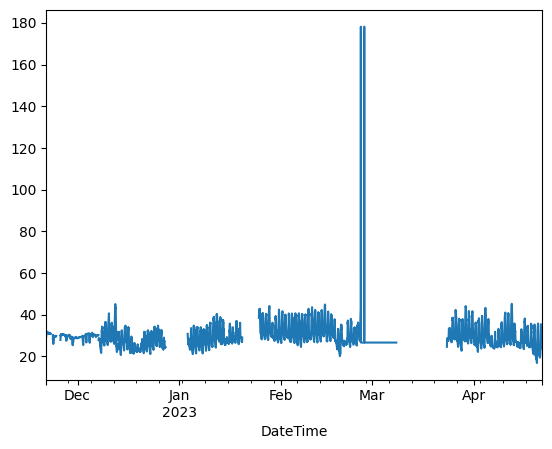

In [32]:
temperature_dataframe['measuring'].plot()

### Smooth data

<Axes: xlabel='DateTime'>

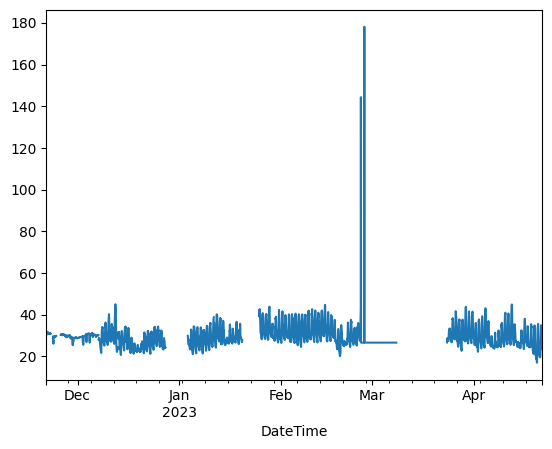

In [33]:
temperature_dataframe['raw measuring'] = temperature_dataframe['measuring']
temperature_dataframe['measuring'] = temperature_dataframe['measuring'].rolling(window=4).median()
temperature_dataframe['measuring'].plot()

### Calculate derivatives

In [34]:
temperature_dataframe['Diff'] = temperature_dataframe['measuring'].resample('15T').mean().diff()

## Humidity Data

In [37]:
import pandas as pd

directory_path = 'data/input/'
file_name = hum_sensor_name + 'web_dataframe.csv'
df = pd.read_csv(directory_path + file_name)
df.head()

,Unnamed: 0,latitude,longitude,measuring,DateTime
0,0,-28.456899,-48.972999,-73.74,2022-11-20 13:44:15
1,1,-28.456899,-48.972999,-61.27,2022-11-21 10:36:42
2,2,-28.456899,-48.972999,-68.13,2022-11-21 10:52:30
3,3,-28.456899,-48.972999,-73.00,2022-11-21 11:08:17
4,4,-28.456899,-48.972999,-70.38,2022-11-21 11:24:04


### Remove the first column with the indexes and save data into web dataframe

In [38]:
web_dataframe = df.drop(df.columns[0], axis='columns')
web_dataframe['DateTime'] = (pd.to_datetime(df['DateTime'], infer_datetime_format=True))
web_dataframe.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_85180/3050369393.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  web_dataframe['DateTime'] = (pd.to_datetime(df['DateTime'], infer_datetime_format=True))


,latitude,longitude,measuring,DateTime
0,-28.456899,-48.972999,-73.74,2022-11-20 13:44:15
1,-28.456899,-48.972999,-61.27,2022-11-21 10:36:42
2,-28.456899,-48.972999,-68.13,2022-11-21 10:52:30
3,-28.456899,-48.972999,-73.00,2022-11-21 11:08:17
4,-28.456899,-48.972999,-70.38,2022-11-21 11:24:04


### Create Sensor Dataframe as Pandas Series with a period of 15 mins

In [39]:
humidity_dataframe = web_dataframe.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
humidity_dataframe.index = humidity_dataframe['DateTime']
humidity_dataframe = humidity_dataframe.drop(columns=['DateTime'])
humidity_dataframe = humidity_dataframe.resample('15T').mean()
humidity_dataframe.head()

,latitude,longitude,measuring
DateTime,,,
2022-11-20 13:30:00,-28.456899,-48.972999,-73.74
2022-11-20 13:45:00,NaN,NaN,NaN
2022-11-20 14:00:00,NaN,NaN,NaN
2022-11-20 14:15:00,NaN,NaN,NaN
2022-11-20 14:30:00,NaN,NaN,NaN


### Plot raw data

<Axes: xlabel='DateTime'>

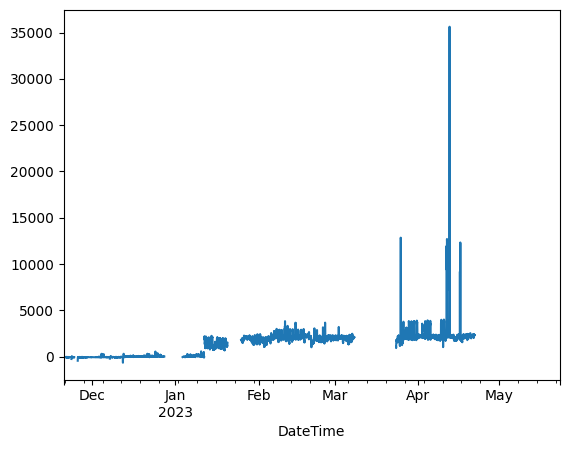

In [40]:
humidity_dataframe['measuring'].plot()

### Smooth data

<Axes: xlabel='DateTime'>

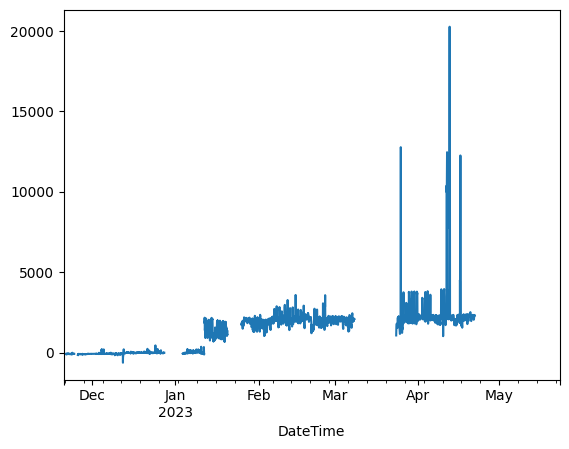

In [41]:
humidity_dataframe['raw measuring'] = humidity_dataframe['measuring']
humidity_dataframe['measuring'] = humidity_dataframe['measuring'].rolling(window=4).median()
humidity_dataframe['measuring'].plot()

### Calculate derivatives

In [42]:
humidity_dataframe['Diff'] = humidity_dataframe['measuring'].resample('15T').mean().diff()

## Tag data

### Temperature Data

In [35]:
temperature_dataframe['Tag'] = 'VALID'

#### Tag values that are missing, are greater than sensor span or are lower than sensor resolution

,latitude,longitude,measuring,raw measuring,Diff,Tag,UPPER LIMIT,LOWER LIMIT
DateTime,,,,,,,,
2022-11-21 10:45:00,-28.456899,-48.972999,NaN,29.55,NaN,VALID,85,-40.0
2022-11-21 11:00:00,-28.456899,-48.972999,NaN,30.14,NaN,VALID,85,-40.0
2022-11-21 11:15:00,-28.456899,-48.972999,NaN,30.61,NaN,VALID,85,-40.0
2022-11-21 11:30:00,-28.456899,-48.972999,30.375,30.82,NaN,VALID,85,-40.0
2022-11-21 11:45:00,-28.456899,-48.972999,30.715,30.99,0.34,VALID,85,-40.0


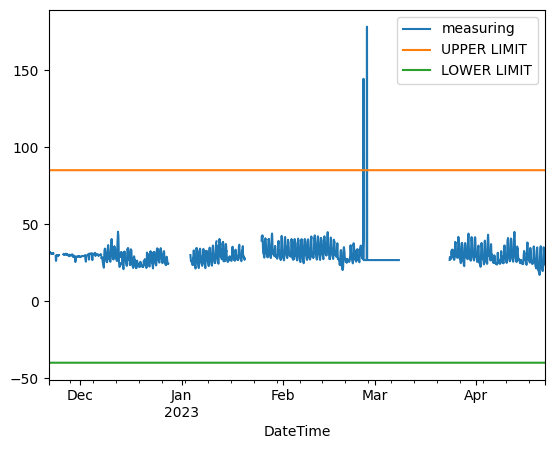

In [43]:
temperature_dataframe['UPPER LIMIT'] = temp_upper_limit
temperature_dataframe['LOWER LIMIT'] = temp_lower_limit
temperature_dataframe[temperature_dataframe['Tag'] == 'VALID'][['measuring', 'UPPER LIMIT', 'LOWER LIMIT']].resample('15T').mean().plot()
temperature_dataframe.head()

In [44]:
import numpy as np
from SensorDataAnalysisService import SensorDataAnalysisService as sensor_analysis

def tag_by_sensor_limits(value, tag, lower_limit, upper_limit):
 if (tag != 'VALID'): return tag
 return sensor_analysis.get_tags_from_series(value=value,
                                             lower_limit=lower_limit,
                                             upper_limit=upper_limit)

temperature_dataframe['Tag'] = (temperature_dataframe[['measuring', 'Tag']]
                                        .apply(lambda df: tag_by_sensor_limits(value=df[0], tag=df[1],
                                                                              lower_limit=temp_lower_limit,
                                                                              upper_limit=temp_upper_limit),
                                                axis=1))
temperature_dataframe.head()

,latitude,longitude,measuring,raw measuring,Diff,Tag,UPPER LIMIT,LOWER LIMIT
DateTime,,,,,,,,
2022-11-21 10:45:00,-28.456899,-48.972999,NaN,29.55,NaN,MISSING,85,-40.0
2022-11-21 11:00:00,-28.456899,-48.972999,NaN,30.14,NaN,MISSING,85,-40.0
2022-11-21 11:15:00,-28.456899,-48.972999,NaN,30.61,NaN,MISSING,85,-40.0
2022-11-21 11:30:00,-28.456899,-48.972999,30.375,30.82,NaN,VALID,85,-40.0
2022-11-21 11:45:00,-28.456899,-48.972999,30.715,30.99,0.34,VALID,85,-40.0


#### Plot valid data

<Axes: xlabel='DateTime'>

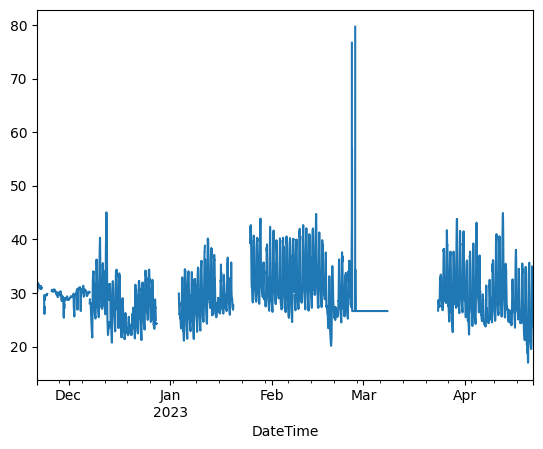

In [45]:
temperature_dataframe[temperature_dataframe['Tag'] == 'VALID']['measuring'].resample('15T').mean().plot()

### Data Tag contabilization

In [46]:
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID']
data_contabilization = sensor_analysis.count_tags(tags, temperature_dataframe)
data_contabilization

,#,%
MISSING,2972,20.438759
LTLL,0,0.0
GTUL,12,0.082525
BADSPIKE,0,0.0
VALID,11557,79.478715
TOTAL,14541,100.0


### Humidity Data

In [48]:
humidity_dataframe['Tag'] = 'VALID'

#### Tag values that are missing, are greater than sensor span or are lower than sensor resolution

,latitude,longitude,measuring,raw measuring,Diff,UPPER LIMIT,LOWER LIMIT,Tag
DateTime,,,,,,,,
2022-11-20 13:30:00,-28.456899,-48.972999,NaN,-73.74,NaN,100,0.0,VALID
2022-11-20 13:45:00,NaN,NaN,NaN,NaN,NaN,100,0.0,VALID
2022-11-20 14:00:00,NaN,NaN,NaN,NaN,NaN,100,0.0,VALID
2022-11-20 14:15:00,NaN,NaN,NaN,NaN,NaN,100,0.0,VALID
2022-11-20 14:30:00,NaN,NaN,NaN,NaN,NaN,100,0.0,VALID


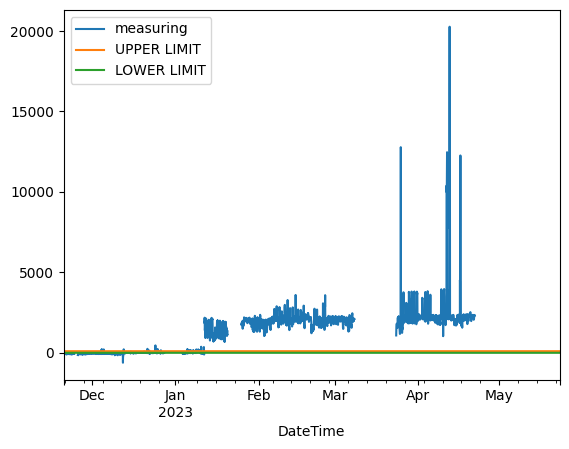

In [49]:
humidity_dataframe['UPPER LIMIT'] = hum_upper_limit
humidity_dataframe['LOWER LIMIT'] = hum_lower_limit
humidity_dataframe[humidity_dataframe['Tag'] == 'VALID'][['measuring', 'UPPER LIMIT', 'LOWER LIMIT']].resample('15T').mean().plot()
humidity_dataframe.head()

In [50]:
import numpy as np
from SensorDataAnalysisService import SensorDataAnalysisService as sensor_analysis

humidity_dataframe['Tag'] = (humidity_dataframe[['measuring', 'Tag']]
                                        .apply(lambda df: tag_by_sensor_limits(value=df[0], tag=df[1],
                                                                              lower_limit=hum_lower_limit,
                                                                              upper_limit=hum_upper_limit),
                                                axis=1))
humidity_dataframe.head()

,latitude,longitude,measuring,raw measuring,Diff,UPPER LIMIT,LOWER LIMIT,Tag
DateTime,,,,,,,,
2022-11-20 13:30:00,-28.456899,-48.972999,NaN,-73.74,NaN,100,0.0,MISSING
2022-11-20 13:45:00,NaN,NaN,NaN,NaN,NaN,100,0.0,MISSING
2022-11-20 14:00:00,NaN,NaN,NaN,NaN,NaN,100,0.0,MISSING
2022-11-20 14:15:00,NaN,NaN,NaN,NaN,NaN,100,0.0,MISSING
2022-11-20 14:30:00,NaN,NaN,NaN,NaN,NaN,100,0.0,MISSING


#### Plot valid data

<Axes: xlabel='DateTime'>

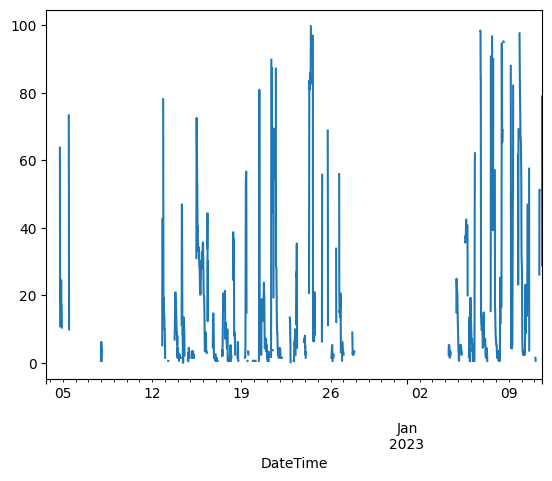

In [51]:
humidity_dataframe[humidity_dataframe['Tag'] == 'VALID']['measuring'].resample('15T').mean().plot()

### Data Tag contabilization

In [52]:
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID']
data_contabilization = sensor_analysis.count_tags(tags, humidity_dataframe)
data_contabilization

,#,%
MISSING,6071,34.400499
LTLL,2665,15.100861
GTUL,7935,44.962602
BADSPIKE,0,0.0
VALID,977,5.536038
TOTAL,17648,100.0


## Analyse valid data

### Temperature Data

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/SensorDataAnalysisService.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Hour'].astype('int64')


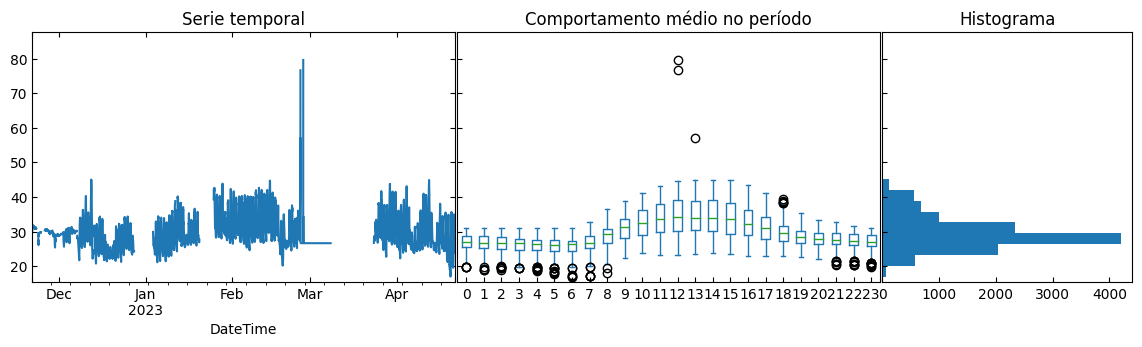

In [53]:
temperature_dataframe['Hour'] = temperature_dataframe.index.hour
valid_dataframe = temperature_dataframe[temperature_dataframe['Tag'] == 'VALID'].drop(columns=['Tag']).resample('15T').mean()
sensor_analysis.plot_box_hist(df=valid_dataframe, bins=20)

### Calculate quantiles

<Axes: xlabel='DateTime'>

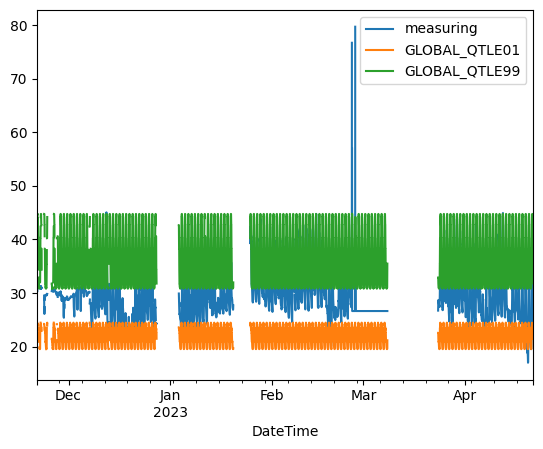

In [54]:
import numpy as np

global_qtle_01 = valid_dataframe.pivot(columns='Hour')['measuring'].quantile(q=0.01, axis='index', interpolation='lower').dropna()
global_qtle_99 = valid_dataframe.pivot(columns='Hour')['measuring'].quantile(q=0.99, axis='index', interpolation='higher').dropna()
temperature_dataframe['GLOBAL_QTLE01'] = temperature_dataframe['Hour'].map(lambda hr: global_qtle_01[hr] if (not np.isnan(hr)) else np.nan)
temperature_dataframe['GLOBAL_QTLE99'] = temperature_dataframe['Hour'].map(lambda hr: global_qtle_99[hr] if (not np.isnan(hr)) else np.nan)
temperature_dataframe[temperature_dataframe['Tag'] == 'VALID'][['measuring', 'GLOBAL_QTLE01', 'GLOBAL_QTLE99']].resample('15T').mean().plot()

### Tag data according to quantiles

In [55]:
temperature_dataframe['Tag'] = (temperature_dataframe[['Tag', 'measuring', 'GLOBAL_QTLE01', 'GLOBAL_QTLE99']]
                           .apply(lambda df: sensor_analysis.tag_by_quantiles(current_tag=df[0],
                                                                              value=df[1],
                                                                              quantile_01=df[2],
                                                                              quantile_99=df[3]),
                                axis=1))
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID', 'LTQTLE01', 'GTQTLE99']
data_contabilization = sensor_analysis.count_tags(tags, temperature_dataframe)
data_contabilization

,#,%
MISSING,2972,20.438759
LTLL,0,0.0
GTUL,12,0.082525
BADSPIKE,0,0.0
VALID,11312,77.793824
LTQTLE01,124,0.852761
GTQTLE99,121,0.83213
TOTAL,14541,100.0


#### Plot valid data

<Axes: xlabel='DateTime'>

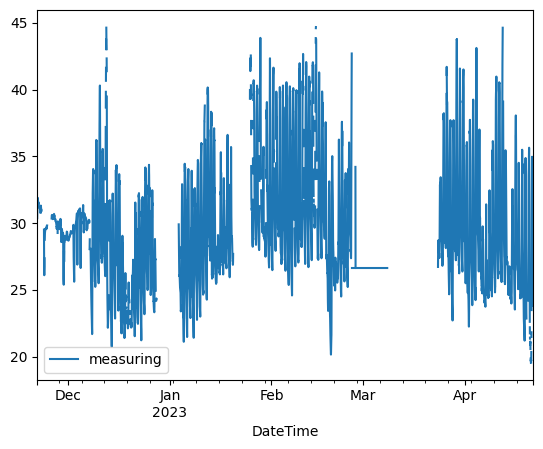

In [56]:
temperature_dataframe[temperature_dataframe['Tag'] == 'VALID'][['measuring']].resample('15T').mean().plot()

#### Analyse data after removing quantiles

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/SensorDataAnalysisService.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Hour'].astype('int64')


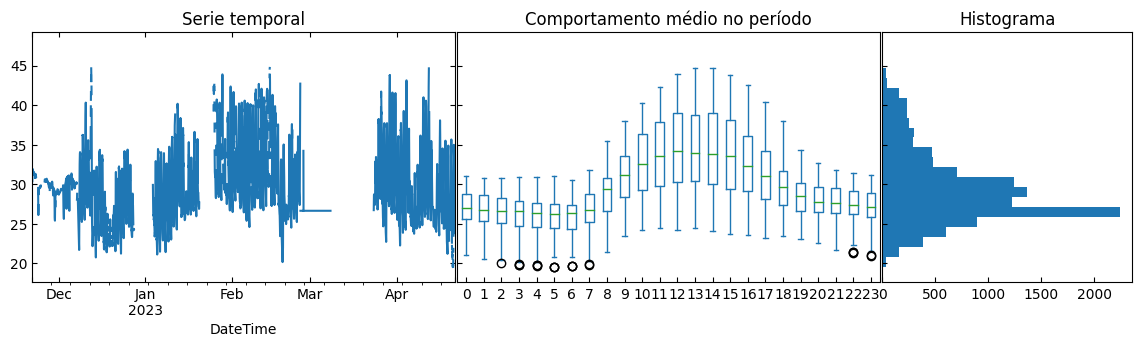

In [57]:
valid_dataframe = temperature_dataframe[temperature_dataframe['Tag'] == 'VALID'].drop(columns=['Tag']).resample('15T').mean()
sensor_analysis.plot_box_hist(df=valid_dataframe, bins=20)

## Analyse data derivatives

<Axes: xlabel='DateTime'>

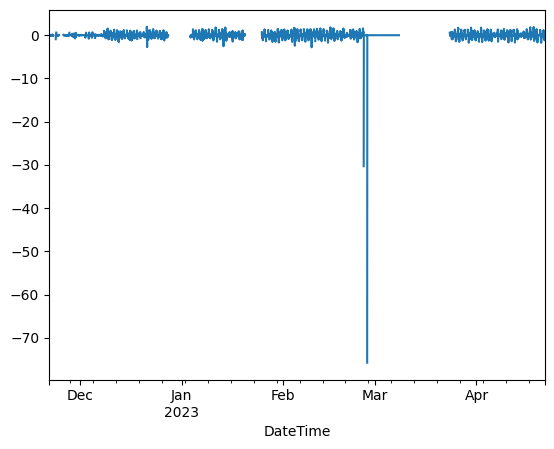

In [58]:
valid_dataframe['Diff'].plot()

#### Plot data derivatives vs data

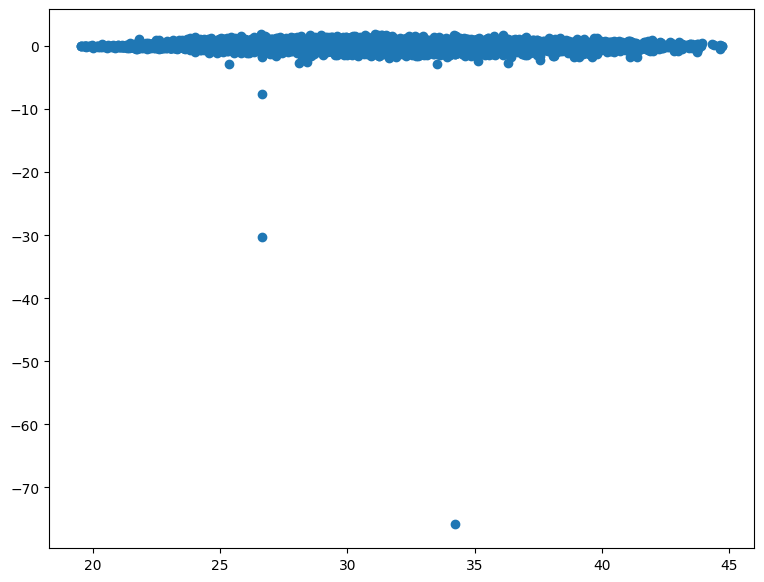

In [59]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(1.3*7,7))
plt.scatter(valid_dataframe['measuring'], valid_dataframe['Diff'])

### Calculate quantiles of the derivatives

<Axes: xlabel='DateTime'>

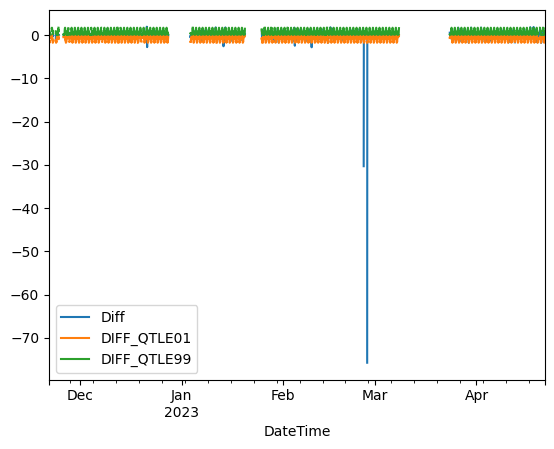

In [60]:
import numpy as np

global_qtle_01 = valid_dataframe.pivot(columns='Hour')['Diff'].quantile(q=0.01, axis='index', interpolation='lower').dropna()
global_qtle_99 = valid_dataframe.pivot(columns='Hour')['Diff'].quantile(q=0.99, axis='index', interpolation='higher').dropna()
temperature_dataframe['DIFF_QTLE01'] = temperature_dataframe['Hour'].map(lambda hr: global_qtle_01[hr] if (not np.isnan(hr)) else np.nan)
temperature_dataframe['DIFF_QTLE99'] = temperature_dataframe['Hour'].map(lambda hr: global_qtle_99[hr] if (not np.isnan(hr)) else np.nan)
temperature_dataframe[temperature_dataframe['Tag'] == 'VALID'][['Diff', 'DIFF_QTLE01', 'DIFF_QTLE99']].resample('15T').mean().plot()

### Tag data according to the quantiles of the derivatives

In [61]:
def tag_by_diff_quantiles(current_tag, value, quantile_01, quantile_99):
    if ((current_tag != 'VALID') or (np.isnan(value))): return current_tag
    if value < quantile_01 or value > quantile_99: return 'BADSPIKE'
    return 'VALID'

temperature_dataframe['Tag'] = (temperature_dataframe[['Tag', 'Diff', 'DIFF_QTLE01', 'DIFF_QTLE99']]
                           .apply(lambda df: tag_by_diff_quantiles(current_tag=df[0],
                                                                    value=df[1],
                                                                    quantile_01=df[2],
                                                                    quantile_99=df[3]),
                                    axis=1))
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID', 'LTQTLE01', 'GTQTLE99']
data_contabilization = sensor_analysis.count_tags(tags, temperature_dataframe)
data_contabilization

,#,%
MISSING,2972,20.438759
LTLL,0,0.0
GTUL,12,0.082525
BADSPIKE,190,1.30665
VALID,11122,76.487174
LTQTLE01,124,0.852761
GTQTLE99,121,0.83213
TOTAL,14541,100.0


#### Plot valid data

<Axes: xlabel='DateTime'>

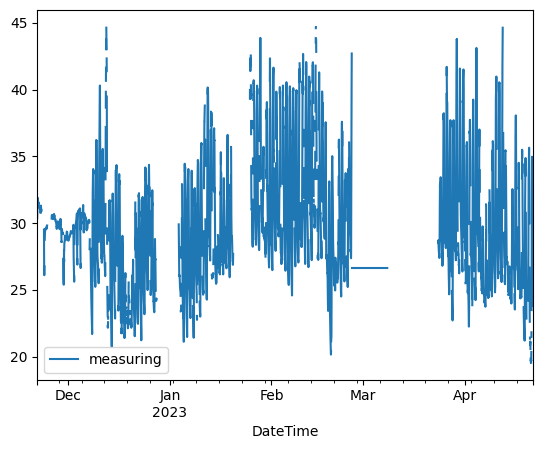

In [62]:
temperature_dataframe[temperature_dataframe['Tag'] == 'VALID'][['measuring']].resample('15T').mean().plot()

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/SensorDataAnalysisService.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Hour'].astype('int64')


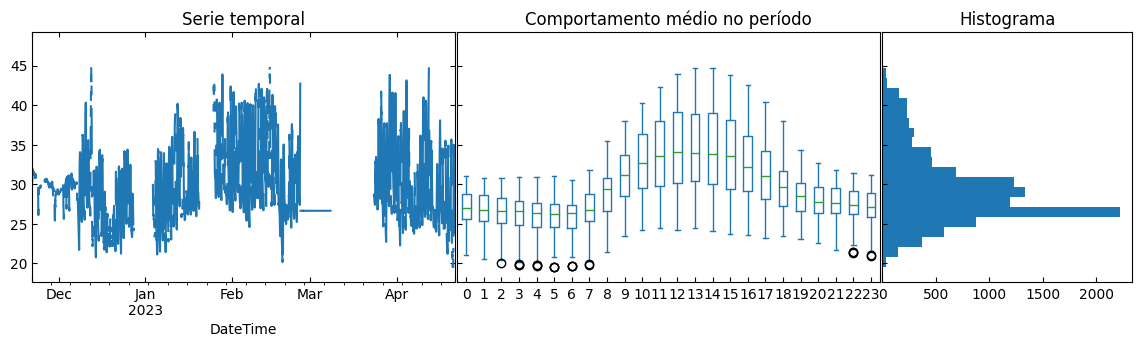

In [63]:
valid_dataframe = temperature_dataframe[temperature_dataframe['Tag'] == 'VALID'].drop(columns=['Tag']).resample('15T').mean()
sensor_analysis.plot_box_hist(df=valid_dataframe, bins=20)

## Resample valid data to 1 HR

<Axes: xlabel='DateTime'>

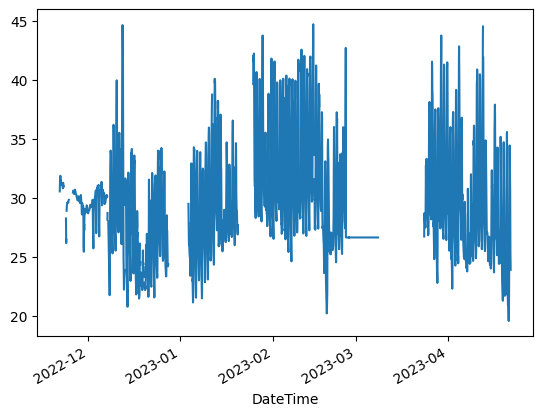

In [64]:
resampled_dataframe = temperature_dataframe[temperature_dataframe['Tag'] == 'VALID'].drop(columns=['Tag']).resample('H').mean()
resampled_dataframe['Hour'] = resampled_dataframe.index.hour
resampled_dataframe['Count'] = (valid_dataframe['measuring'].resample('H').count())
resampled_dataframe['Std'] = (valid_dataframe['measuring'].resample('H').std())
resampled_dataframe.index = resampled_dataframe.index.map(lambda t: t.replace(minute=30, second=0))
resampled_dataframe['measuring'].plot()

#### Tag hourly data according to the number of samples in an hour
At least 3 samples must be valid in an hour (75 %) for the hourly data be considered as valid

<Axes: xlabel='DateTime'>

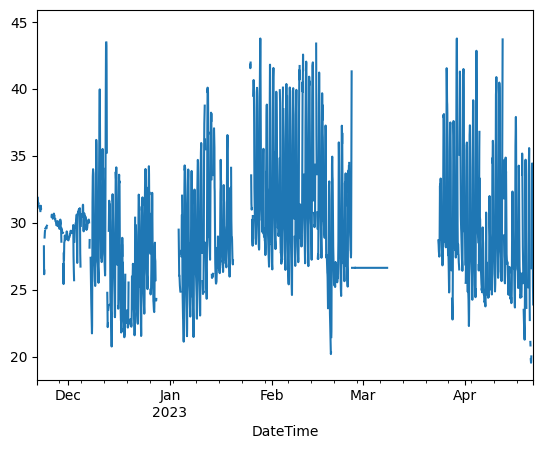

In [65]:
original_freq = temperature_dataframe.index.freq
resampled_dataframe['% valid'] = (resampled_dataframe['Count']
                                    .map(lambda c:
                                        c / (pd.Timedelta("1 hour") / original_freq) * 100))
resampled_dataframe['Tag'] = (resampled_dataframe['% valid']
                                .map(lambda c: 'VALID' if c >= 75 else 'LOWSAMPLES'))
resampled_dataframe[resampled_dataframe['Tag'] == 'VALID']['measuring'].resample('H').mean().plot()

#### Valid data contabilization

In [66]:
tags = ['LOWSAMPLES','VALID'] 
data_contabilization = sensor_analysis.count_tags(tags, resampled_dataframe)
data_contabilization

,#,%
LOWSAMPLES,863,23.741403
VALID,2772,76.258597
TOTAL,3635,100.0


#### Plot mean vs. standard deviation for valid hourly data colored by valid percentage of valid samples

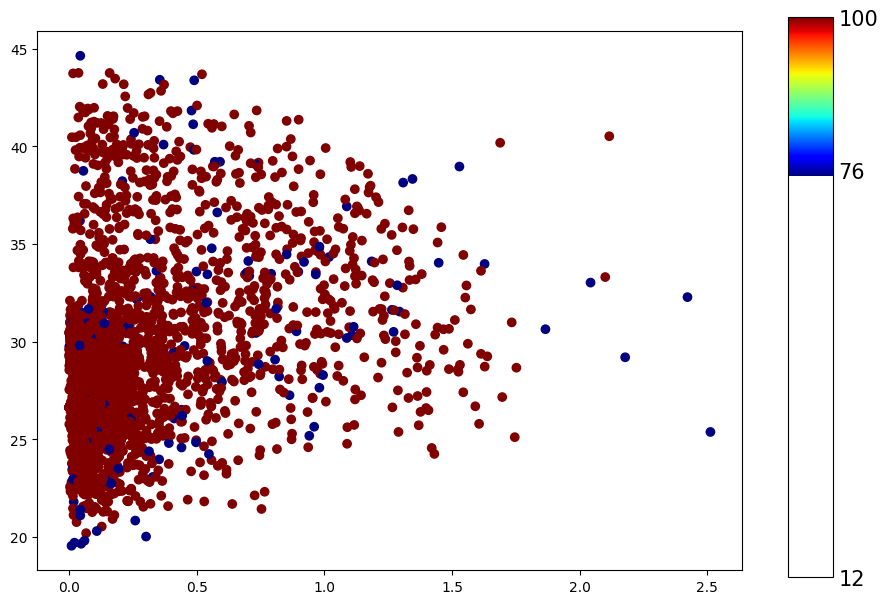

In [67]:
valid_resampled_dataframe = resampled_dataframe[resampled_dataframe['Tag'] == 'VALID']
sensor_analysis.plot_mean_vs_std(valid_resampled_dataframe)

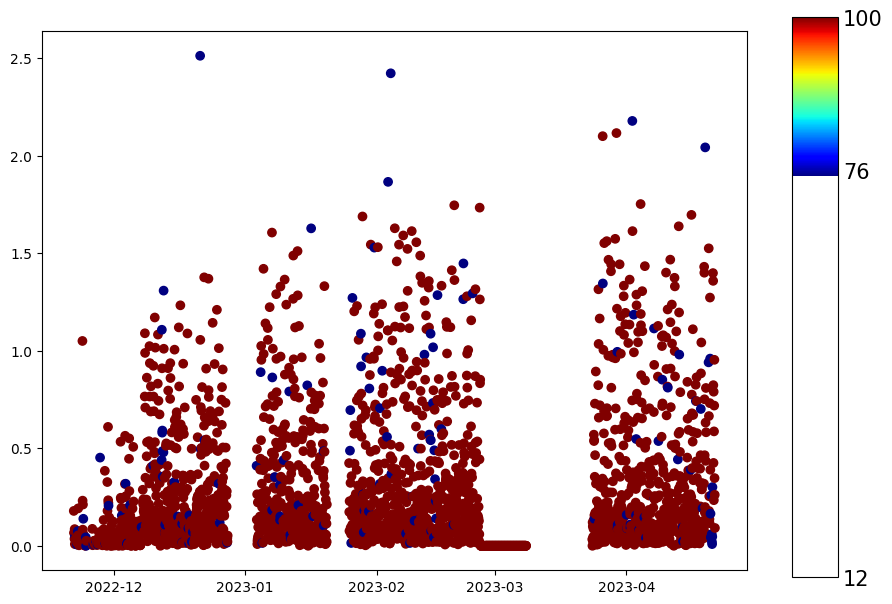

In [68]:
sensor_analysis.plot_std_in_time(valid_resampled_dataframe)

# Save Data

In [69]:
import os

output_directory_path = 'data/output/'
processing_directory_path = '../data-processing/input/'
valid_1HR_filename = 'valid_data_1HR.csv'
valid_filename = 'valid_data.csv'
dataframe_filename = 'dataframe.csv'
dataframe_1HR_filename = 'dataframe_1hr.csv'

valid_1HR_file_path_output = output_directory_path + temp_sensor_name + valid_1HR_filename
valid_file_path_output = output_directory_path + temp_sensor_name + valid_filename

dataframe_path_1HR_output = output_directory_path + temp_sensor_name + dataframe_1HR_filename
dataframe_path_output = output_directory_path + temp_sensor_name + dataframe_filename

valid_processing_1HR_file_path = processing_directory_path + temp_sensor_name + valid_1HR_filename
valid_processing_file_path = processing_directory_path + temp_sensor_name + valid_filename

processing_dataframe_path_1HR = processing_directory_path + temp_sensor_name + dataframe_1HR_filename
processing_dataframe_path = processing_directory_path + temp_sensor_name + dataframe_filename

if not os.path.exists(output_directory_path):
    os.makedirs(output_directory_path)

if not os.path.exists(processing_directory_path):
    os.makedirs(processing_directory_path)

temperature_dataframe[temperature_dataframe['Tag'] == 'VALID'][['measuring']].to_csv(valid_file_path_output)
valid_resampled_dataframe[['measuring']].to_csv(valid_1HR_file_path_output)
temperature_dataframe.to_csv(dataframe_path_output)
resampled_dataframe.to_csv(dataframe_path_1HR_output)

temperature_dataframe[temperature_dataframe['Tag'] == 'VALID'][['measuring']].to_csv(valid_processing_file_path)
valid_resampled_dataframe[['measuring']].to_csv(valid_processing_1HR_file_path)
temperature_dataframe.to_csv(processing_dataframe_path)
resampled_dataframe.to_csv(processing_dataframe_path_1HR)
